In [23]:
from function_library import Road_Profiler, Road_Merger # my own function library

In [24]:
D1 = Road_Profiler(0,200)
D2 = Road_Profiler(0.04,200)
D3 = Road_Profiler(0,200)
D4 = Road_Profiler(-0.04,200)
D5 = Road_Profiler(0,200)
Road = Road_Merger([D1,D2,D3,D4,D5])
Road

{'x': array([  0.        ,   1.        ,   2.        , ..., 997.68038349,
        998.68038349, 999.68038349]),
 'y': array([0., 0., 0., ..., 0., 0., 0.]),
 'Gradient': array([0., 0., 0., ..., 0., 0., 0.]),
 'Distances': array([200, 200, 200, 200, 200]),
 'Total_Distance': 1000}

In [25]:
Road['Gradient'][201]

0.04

In [26]:
def Time_Calculation(V_initial, a):
    discriminant = V_initial**2 - 2*a
    if discriminant > 0:
        d_t = 1 / (V_initial + discriminant**0.5)
        if 0 < d_t < 1.5:
            return d_t
    return 0

Time_Calculation(0, 2)

0

In [27]:
import sympy as sp

def Time_Calculation(V_initial, a):
    t = sp.symbols('t')
    eq = 0.5 * a * t**2 + V_initial * t - 1
    d_t = sp.solve(eq, t)
    d_t = [float(sol) for sol in d_t if 0 < sol < 10]
    
    if len(d_t) > 0:
        return d_t[0]
    else:
        return 0
    
Time_Calculation(0, 0.1)

4.47213595499958

In [28]:
import numpy as np
gradient_radians = np.arctan(0.04)

print(gradient_radians)

0.039978687123290044


In [29]:
import Custom_Environment

env = Custom_Environment.CustomEnv()

In [30]:
env.reset()

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. ,
       0. ])

In [31]:
road = env.road
print(max(road['y']))

7.993607669774317


In [32]:
import sympy as sp
a = 0.1
V_initial = 0
t = sp.symbols('t')
eq = 0.5 * a * t**2 + V_initial * t - 1 # Time spent for 1 meter distance with initial velocity V_initial and acceleration a
d_t = sp.solve(eq, t)
d_t = [float(sol) for sol in d_t if 0 < sol < 10] # 0 < t < 10 seconds to avoid unrealistic values 
    
if len(d_t) > 0:
    print(d_t[0])
else:
    print(0)

4.47213595499958


In [33]:
xx = (23, 56)
print(xx, xx[0])

(23, 56) 23


Total Reward:           Agent:  99.60321219546223 Dummy:  99.60321219546223
Total Time Reward:      Agent:  -129.44844149144507 Dummy:  -129.44844149144507
Total Energy Reward:    Agent:  -70.94834631309271 Dummy:  -70.94834631309271
Total Position Reward:  Agent:  300.0 Dummy:  300.0


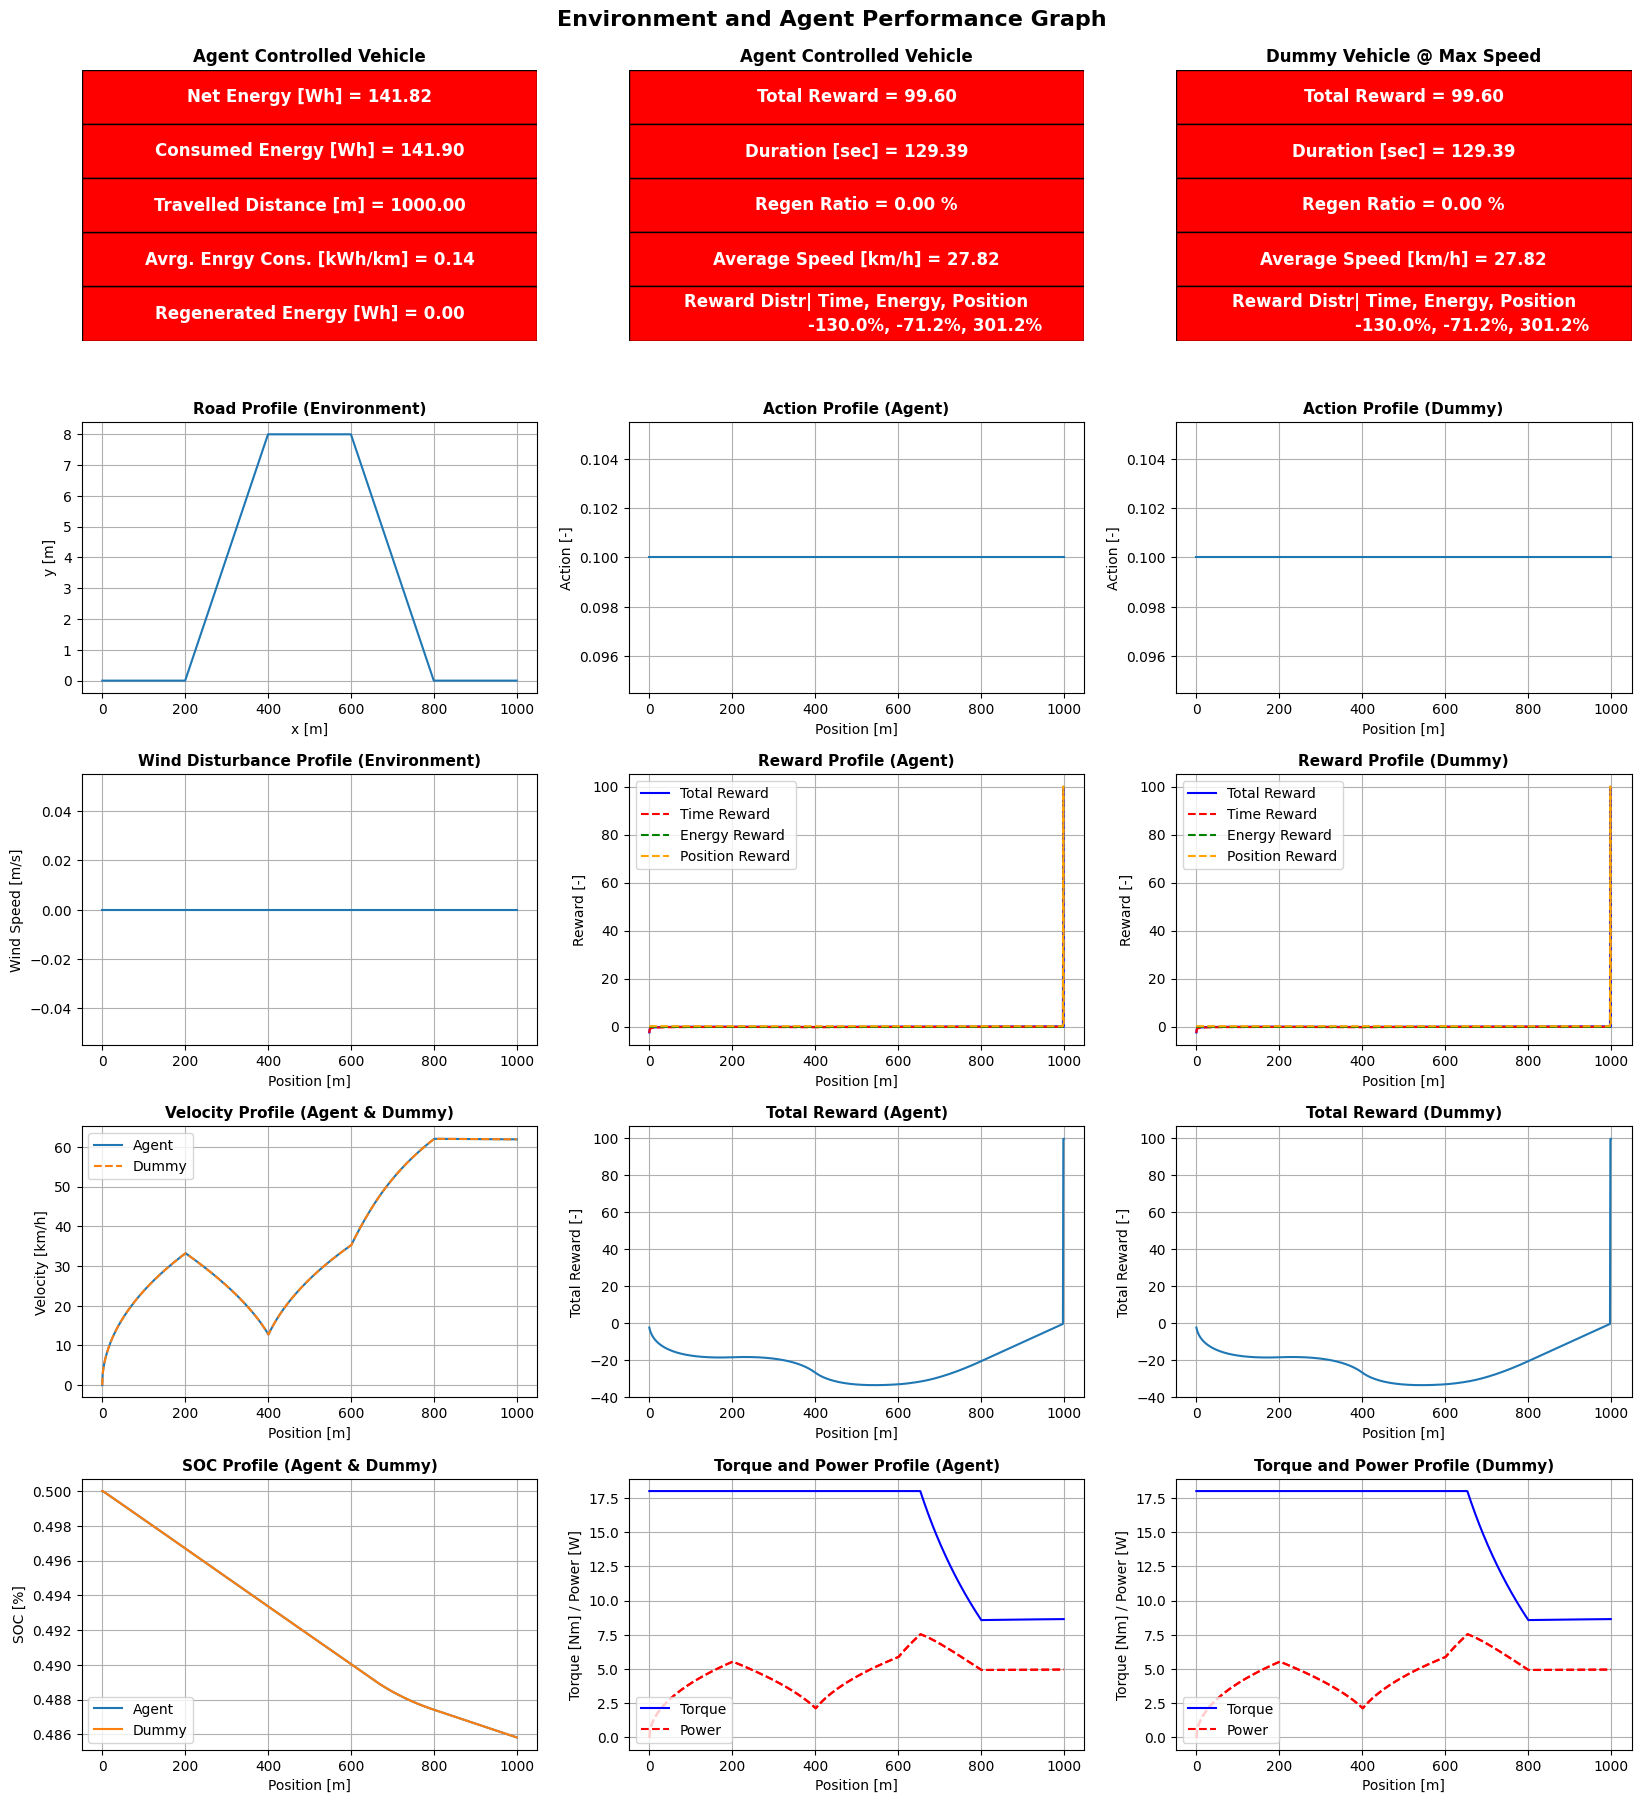

c:\Repositories\Personal_Repositories\Deep_Learning\DRL_Deep_Reinforcement_Learning\Motion_Optimization_of_an_Electric_Vehicle_for_Range_Extension\Simulation Outputs\Simulation Outputs - 2023-07-17_23-19-08\Episode_1__Score_99.60321219546223__Date_2023-07-17_23-19-11.png


In [9]:
# Environment Debugging
# 0. Import the environment
import Custom_Environment
from function_library import grapher, create_folder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output
import datetime
import os

def save_outputs(folder_path, database, episode_number, Score, fig):
    
    # Get the current time
    now = datetime.datetime.now()
    # Define the figure name
    simulation_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    fig_name = f"Episode_{episode_number}__Score_{Score}__Date_{simulation_time}.png"
    database_name = f"Episode_{episode_number}_Database_.csv"
    database_name_2 = f"Episode_{episode_number}_Database_.df"
    # Save the figure
    full_path = os.path.join(folder_path, fig_name)
    print(full_path)
    fig.savefig(full_path)
    #plt.savefig(full_path)
    # Save the database
    full_path = os.path.join(folder_path, database_name)
    database.to_csv(full_path, index=False)
    full_path = os.path.join(folder_path, database_name_2)
    database.to_pickle(full_path)
    # Close the figure
    plt.close()

# 1. Create a folder to save the results
folder_path = create_folder()

# 2. Create the variables for the environment, debug values, visualization
# Dataframe for state and debug values
columnm = ['Pos','act','x','y','v','a','Duration','Gradient','SOC','Power','Energy','F_load','F_traction','Wind','dt','Brake','Throttle','Power','Torque','dt_Energy_wh','Total_Reward','dt_Time_reward','dt_Energy_reward','dt_Position_reward']
database = pd.DataFrame(columns=columnm)


# 3. Create the environment
env = Custom_Environment.CustomEnv(wind_disturbance_enabled=False)
env.reset()

# 4. Run the environment
# Simulation time 68 secs for 1001 steps
for episode_number in range(1,2):
    env.reset()
    for i in range(1001):
        #if i <= 200:        env.step(0.2)
        #elif i <= 400:      env.step(0.2)
        #elif i <= 600:      env.step(0.1)
        #elif i <= 650:      env.step(-0.1)
        #elif i <= 700:      env.step(0)
        #elif i <= 750:      env.step(-0.1)
        #elif i <= 800:      env.step(0)
        #elif i <= 850:      env.step(0.1)
        #elif i <= 900:      env.step(0.2)
        #elif i <= 975:      env.step(0.1)
        #else:               env.step(-0.1)
        env.step(0.1)
        database.loc[i] = np.concatenate([env.current_state, env.debug_values])
    Score, plot, fig = grapher(env, database, database, show_fig=True)
    save_outputs(folder_path, database, episode_number, Score, fig)
    clear_output(wait=True)




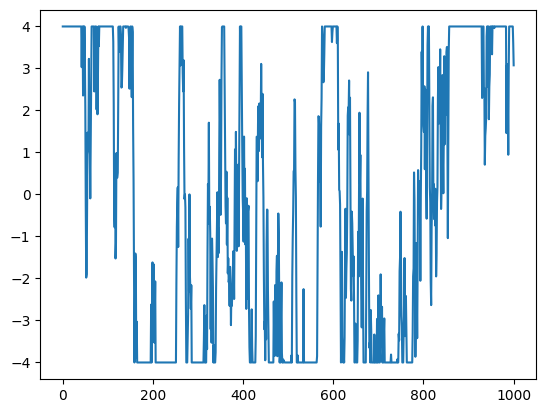

In [12]:
import Custom_Environment
from Custom_Environment import OUNoise
import math, statistics, numpy as np
# __init__(self, size, seed, mu=0., theta=0.1, sigma=10/3): # sigma=0.3
w  = OUNoise(1, 8, 0, 0.05, 5)	# 1, 0, 0, 0.05, 4
w.reset()
print(w)
import matplotlib.pyplot as plt
x = []
xx = np.array([])
xxx = np.array([])  
sample = 0
for i in range(1001):
    sample = 50 - w.sample()
    sample = np.clip(sample, -4, 4)
    
    x.append(sample)
    #xx = np.concatenate((xx,x))
    #xxx = np.concatenate((xxx,sample))
    #print(w.sample())
plt.plot(x)
#plt.plot(xx)
#plt.legend(['w.sample()', 'x = 10 - w.sample()'])
#plt.show()
#print(max(xx), min(xx))
#print(np.mean(xx), np.std(xx))


# Limit the xx values between -10 and 10
#print("Limit the xx values between -10 and 10")
#xx_limit = np.clip(xx, -10, 10)
#print(xx_limit)
#print(max(xx_limit), min(xx_limit))
#print(np.mean(xx_limit), np.std(xx_limit))
#plt.plot(xx_limit)

In [131]:
print(w.sample())

[52.70739233]


In [10]:
def create_folder():
    import datetime
    import os
    # Get the current time
    now = datetime.datetime.now()
    
    # Define the folder name
    folder_name = now.strftime("Simulation Outputs - %Y-%m-%d_%H-%M-%S")
    
    # Get the current directory
    current_dir = os.getcwd()
    
    # Create the folder path
    folder_path = os.path.join(current_dir, folder_name)
    
    # Create the folder
    os.makedirs(folder_path)

    return folder_path
folder_path = create_folder()

Total Reward:  -73.70695304440224
Total Time Reward:  -126.56580634303377
Total Energy Reward:  -147.14114670136854
Total Position Reward:  200.0


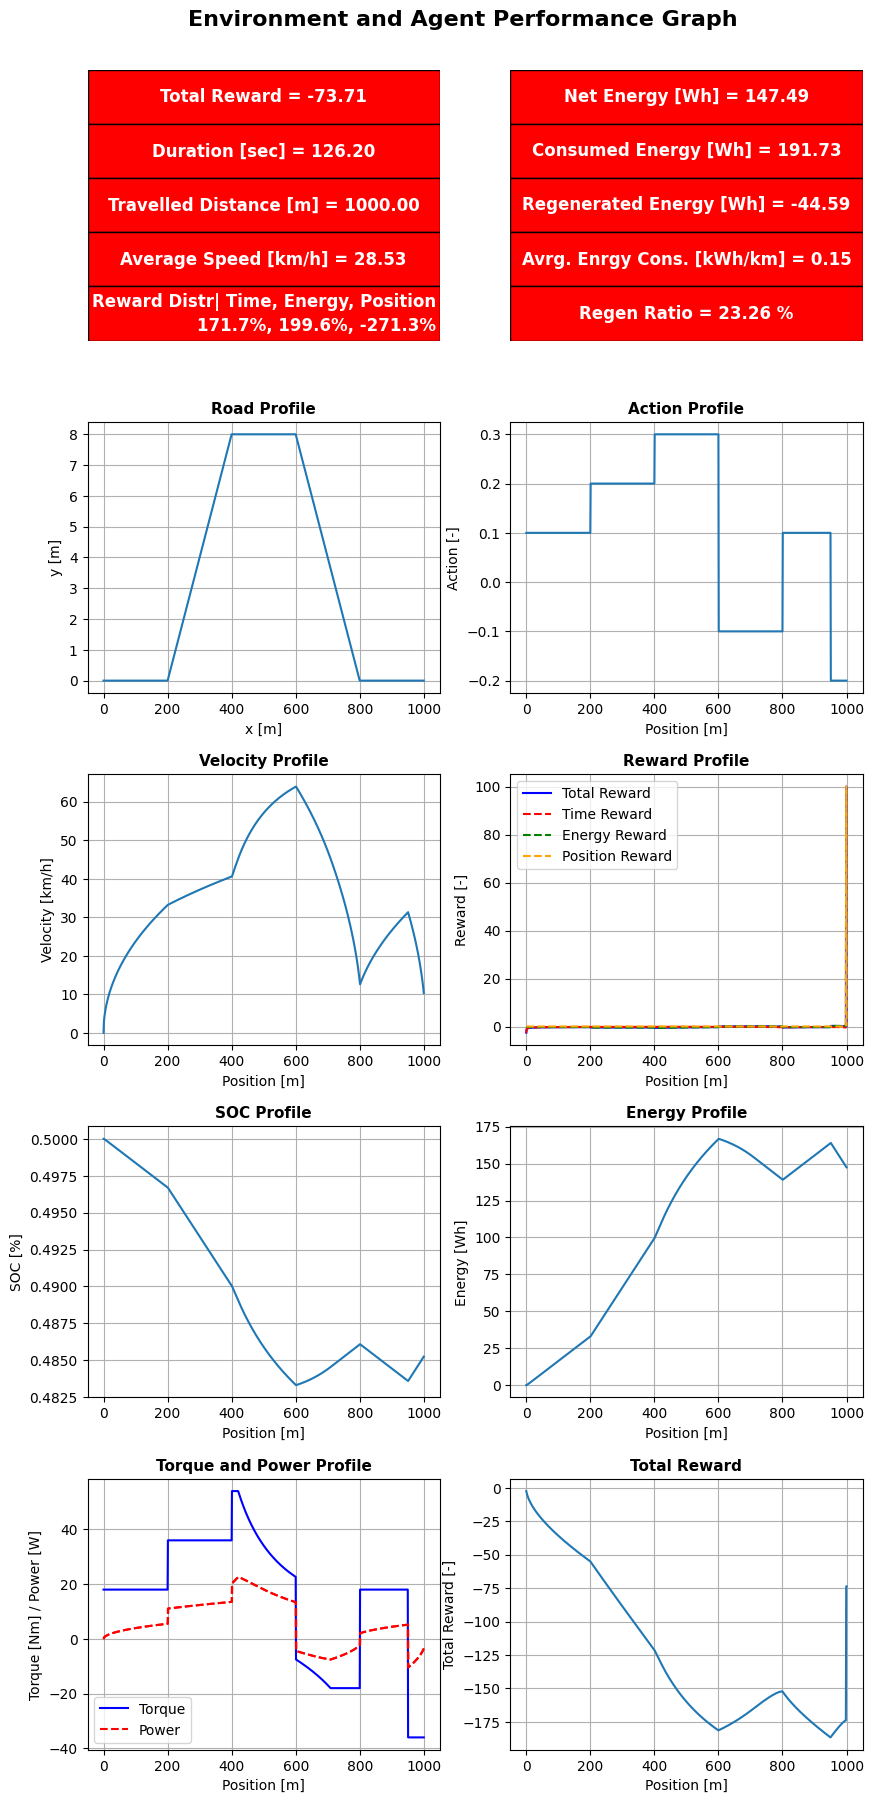

In [7]:
def grapher():

    # Reward distribution calculation
    total_time_reward = database['dt_Time_reward'].sum()
    total_energy_reward = database['dt_Energy_reward'].sum()
    total_position_reward = database['dt_Position_reward'].sum()
    total_reward = database['Total_Reward'].sum()
    time_reward_percentage = total_time_reward / total_reward *100          # % of the total reward
    energy_reward_percentage = total_energy_reward / total_reward *100      # % of the total reward
    position_reward_percentage = total_position_reward / total_reward *100  # % of the total reward
    print("Total Reward: ", total_reward)
    print("Total Time Reward: ", total_time_reward)
    print("Total Energy Reward: ", total_energy_reward)
    print("Total Position Reward: ", total_position_reward)


    fig, axs = plt.subplots(5,2,figsize=(10,20))
    fig.suptitle('Environment and Agent Performance Graph', fontsize=16, fontweight='bold')
    
    # Adding the Performance Indicator Squares
    # Subplot 1
    # Total Reward
    axs[0,0].axis('off')
    axs[0,0].add_patch(patches.Rectangle((0.0, 0.8), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['Total_Reward'].sum(),".2f")
    axs[0,0].text(0.5, 0.9, 'Total Reward = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Total Time
    axs[0,0].add_patch(patches.Rectangle((0.0, 0.6), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['Duration'].iloc[-1],".2f")
    axs[0,0].text(0.5, 0.7, 'Duration [sec] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Distace Traveled
    axs[0,0].add_patch(patches.Rectangle((0.0, 0.4), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['Pos'].iloc[-1],".2f")
    axs[0,0].text(0.5, 0.5, 'Travelled Distance [m] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Average Speed, km/h
    axs[0,0].add_patch(patches.Rectangle((0.0, 0.2), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['Pos'].iloc[-1]/database['Duration'].iloc[-1]*3.6,".2f")
    axs[0,0].text(0.5, 0.3, 'Average Speed [km/h] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Reward distribution over time, energy and position
    axs[0,0].add_patch(patches.Rectangle((0.0, 0.0), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text_1 = format(time_reward_percentage,".1f")
    formatted_text_2 = format(energy_reward_percentage,".1f")
    formatted_text_3 = format(position_reward_percentage,".1f")
    axs[0,0].text(0.5, 0.11, 'Reward Distr| Time, Energy, Position', ha='center', va='bottom', color='white', fontsize=12,fontweight='bold')
    axs[0,0].text(0.65, 0.09, '{}%, {}%, {}%'.format(formatted_text_1,formatted_text_2,formatted_text_3), ha='center', va='top', color='white', fontsize=12,fontweight='bold')
    del formatted_text, formatted_text_1, formatted_text_2, formatted_text_3
    
    # Subplot 2
    axs[0,1].axis('off')
    # Total Energy
    axs[0,1].add_patch(patches.Rectangle((0.0, 0.8), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['Energy'].iloc[-1]*1000,".2f")
    axs[0,1].text(0.5, 0.9, 'Net Energy [Wh] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Consumted Energy
    axs[0,1].add_patch(patches.Rectangle((0.0, 0.6), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['dt_Energy_wh'][database['dt_Energy_wh'] > 0].sum(),".2f")
    axs[0,1].text(0.5, 0.7, 'Consumed Energy [Wh] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Regenerated Energy
    axs[0,1].add_patch(patches.Rectangle((0.0, 0.4), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['dt_Energy_wh'][database['dt_Energy_wh'] < 0].sum(),".2f")
    axs[0,1].text(0.5, 0.5, 'Regenerated Energy [Wh] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Average Energy Consumption, Wh/km
    axs[0,1].add_patch(patches.Rectangle((0.0, 0.2), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['Energy'].iloc[-1]/(database['Pos'].iloc[-1]/1000),".2f")
    axs[0,1].text(0.5, 0.3, 'Avrg. Enrgy Cons. [kWh/km] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Regen Ratio
    axs[0,1].add_patch(patches.Rectangle((0.0, 0.0), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(abs((database['dt_Energy_wh'][database['dt_Energy_wh'] < 0].sum()/database['dt_Energy_wh'][database['dt_Energy_wh'] > 0].sum())*100),".2f")
    axs[0,1].text(0.5, 0.1, 'Regen Ratio = {} %'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    
    
    
    
    # Subplot 3
    # Plot the road
    axs[1,0].plot(env.road['x'], env.road['y'])
    axs[1,0].set_xlabel('x [m]')
    axs[1,0].set_ylabel('y [m]')
    axs[1,0].set_title('Road Profile', fontsize=11, fontweight='bold')
    axs[1,0].grid()
    
    # Subplot 4
    # Plot the actions
    axs[1,1].plot(database['Pos'], database['act'])
    axs[1,1].set_xlabel('Position [m]')
    axs[1,1].set_ylabel('Action [-]')
    axs[1,1].set_title('Action Profile', fontsize=11, fontweight='bold')
    axs[1,1].grid()
    
    # Subplot 5
    # Plot the velocity
    axs[2,0].plot(database['Pos'], database['v']*3.6)
    axs[2,0].set_xlabel('Position [m]')
    axs[2,0].set_ylabel('Velocity [km/h]')
    axs[2,0].set_title('Velocity Profile', fontsize=11, fontweight='bold')
    axs[2,0].grid()
    
    # Subplot 6
    # Plot the Rewards
    axs[2,1].plot(database['Pos'], database['Total_Reward'], color='blue')
    axs[2,1].plot(database['Pos'], database['dt_Time_reward'], '--', color='red')
    axs[2,1].plot(database['Pos'], database['dt_Energy_reward'], '--', color='green')
    axs[2,1].plot(database['Pos'], database['dt_Position_reward'], '--', color='orange')
    axs[2,1].set_xlabel('Position [m]')
    axs[2,1].set_ylabel('Reward [-]')
    axs[2,1].set_title('Reward Profile', fontsize=11, fontweight='bold')
    axs[2,1].legend(['Total Reward','Time Reward','Energy Reward','Position Reward'], loc='upper left', fontsize=10)
    axs[2,1].grid()
    
    # Subplot 7
    # Plot the SOC
    axs[3,0].plot(database['Pos'], database['SOC'])
    axs[3,0].set_xlabel('Position [m]')
    axs[3,0].set_ylabel('SOC [%]')
    axs[3,0].set_title('SOC Profile', fontsize=11, fontweight='bold')
    axs[3,0].grid()
    
    # Subplot 8
    # Plot the Power and Energy
    axs[3,1].plot(database['Pos'], database['Energy']*1000)
    axs[3,1].set_xlabel('Position [m]')
    axs[3,1].set_ylabel('Energy [Wh]')
    axs[3,1].set_title('Energy Profile', fontsize=11, fontweight='bold')
    axs[3,1].grid()
    
    # Subplot 9
    # Plot the Torque and Power
    axs[4,0].plot(database['Pos'], database['Torque'], color='blue')
    axs[4,0].plot(database['Pos'], database['Power'], '--', color='red')
    axs[4,0].set_xlabel('Position [m]')
    axs[4,0].set_ylabel('Torque [Nm] / Power [W]')
    axs[4,0].set_title('Torque and Power Profile', fontsize=11, fontweight='bold')
    axs[4,0].legend(['Torque','Power'], loc='lower left', fontsize=10)
    axs[4,0].grid()
    
    
    
    # Plot the Total Reward
    axs[4,1].plot(database['Pos'], database['Total_Reward'].cumsum())
    axs[4,1].set_xlabel('Position [m]')
    axs[4,1].set_ylabel('Total Reward [-]')
    axs[4,1].set_title('Total Reward', fontsize=11, fontweight='bold')
    axs[4,1].grid()
    
    # Plot Adjusting
    plt.subplots_adjust(hspace=0.3, top=0.95)
    plt.show()
    
grapher()

In [5]:
# Simulations Outputs Folder Creation
def create_folder():
    import datetime
    import os
    # Get the current time
    now = datetime.datetime.now()
    
    # Define the folder name
    folder_name = now.strftime("Simulation Outputs - %Y-%m-%d_%H-%M-%S")
    
    # Get the current directory
    current_dir = os.getcwd()
    
    # Create the folder path
    folder_path = os.path.join(current_dir, folder_name)
    
    # Create the folder
    os.makedirs(folder_path)

    return folder_path

In [4]:
def save_outputs(folder_path, database, episode_number, Score):
    import matplotlib.pyplot as plt
    import datetime
    import os
    import matplotlib.pyplot as plt
    import time
    # Get the current time
    now = datetime.datetime.now()
    # Define the figure name
    simulation_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    fig_name = f"Episode_{episode_number}__Score_{Score}__Date_{simulation_time}.png"
    database_name = f"Episode_{episode_number}_Database_.csv"
    database_name_2 = f"Episode_{episode_number}_Database_.df"
    # Save the figure
    full_path = os.path.join(folder_path, fig_name)
    print(full_path)
    plt.savefig(full_path)
    # Save the database
    full_path = os.path.join(folder_path, database_name)
    database.to_csv(full_path, index=False)
    full_path = os.path.join(folder_path, database_name_2)
    database.to_pickle(full_path)
    # Close the figure
    plt.close()
    
save_outputs(folder_path, database, episode_number, Score)


c:\Repositories\Personal_Repositories\Deep_Learning\DRL_Deep_Reinforcement_Learning\Motion_Optimization_of_an_Electric_Vehicle_for_Range_Extension\Simulation Outputs - 2023-07-13_22-16-49\Episode_9__Score_-73.70695304440224__Date_2023-07-13_22-20-24.png


In [ ]:
# Time Calculation Optimizations
import math
import sympy as sp  # Symbolic Python
import time

def Time_Calculation_optimized(V_initial, a):
    # solve the quadratic equation 0.5*a*t^2 + V_initial*t - 1 = 0
    # equation form is at^2 + bt + c = 0
    # solution is t = [-b ± sqrt(b^2 - 4ac)] / (2a)
    a *= 0.5
    b = V_initial
    c = -1

    # calculate discriminant
    discriminant = b**2 - 4*a*c
    if discriminant < 0:
        # no real solutions
        return 0

    sqrt_discriminant = math.sqrt(discriminant)
    t1 = (-b - sqrt_discriminant) / (2*a)
    t2 = (-b + sqrt_discriminant) / (2*a)
    
    # return the smallest positive solution in range (0, 10)
    if 0 < t1 < 10 and 0 < t2 < 10:
        return min(t1, t2)
    elif 0 < t1 < 10:
        return t1
    elif 0 < t2 < 10:
        return t2
    else:
        return 0


def Time_Calculation(V_initial, a):
        t = sp.symbols('t')
        eq = 0.5 * a * t**2 + V_initial * t - 1 # Time spent for 1 meter distance with initial velocity V_initial and acceleration a
        d_t = sp.solve(eq, t)
        try:
            d_t = [float(sol) for sol in d_t if 0 < sol < 10] # 0 < t < 10 seconds to avoid unrealistic values 
            return d_t[0]
        except:
            return 0
        
# Sonucu yazdır
tt = -2.5
xx = 50
# Test the function
print(Time_Calculation_optimized(xx, tt))
print(Time_Calculation(xx, tt))

start_time = time.time()
for i in range(1000):
    Time_Calculation_optimized(xx, tt)
end_time = time.time()
execution_time = end_time - start_time
print("OPTIMIZE Kodun çalışma süresi: {} saniye".format(execution_time))
start_time = time.time()
for i in range(1000):
    Time_Calculation(xx, tt)
end_time = time.time()
execution_time = end_time - start_time
print("Kodun çalışma süresi: {} saniye".format(execution_time))

0.020010010012518363
0.020010010012517527
OPTIMIZE Kodun çalışma süresi: 0.0010001659393310547 saniye
Kodun çalışma süresi: 18.32572865486145 saniye


Kodun çalışma süresi: 0.3710901737213135 saniye
Kodun çalışma süresi: 0.36629462242126465 saniye
Kodun çalışma süresi: 0.0 saniye
Kodun çalışma süresi: 0.0 saniye


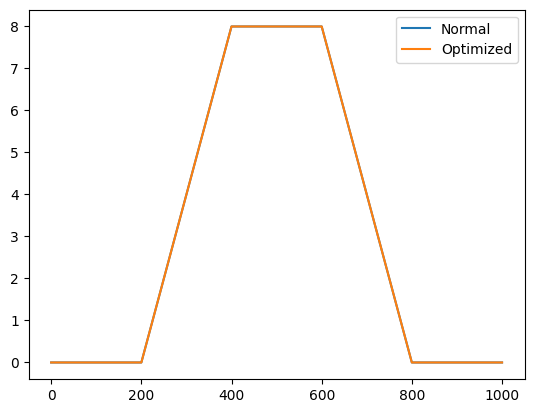

In [ ]:
# road profiler and road merger optimization
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from function_library import Road_Merger, Road_Profiler

def Road_Profiler_Optimized(gradient, distance):
    D = {}
    D['Gradient'] = np.full(distance+1, gradient)
    D['degree'] = math.atan(D['Gradient'][1]) * 180 / math.pi
    D['radian'] = math.atan(D['Gradient'][1])
    D['x'] = np.arange(distance+1) * math.cos(D['radian'])
    D['y'] = np.where(D['radian'] == 0, 0, np.arange(distance+1) * math.sin(D['radian']))
    D['Distance'] = distance

    return D

def Road_Merger_Optimized(R):
    Road = {'x': [], 'y': [], 'Gradient': [], 'Distances': [], 'Total_Distance': 0}

    road_count = len(R)
    
    for i in range(road_count):
        if i == 0:
            Road['x'].extend(R[i]['x'])
            Road['y'].extend(R[i]['y'])
            Road['Gradient'].extend(R[i]['Gradient'])
        else:
            Road['x'].extend(Road['x'][-1] + R[i]['x'][1:])
            Road['y'].extend(Road['y'][-1] + R[i]['y'][1:])
            Road['Gradient'].extend(R[i]['Gradient'][1:])

        Road['Distances'].append(R[i]['Distance'])
        Road['Total_Distance'] += R[i]['Distance']

    # Convert lists to NumPy arrays
    for key in ['x', 'y', 'Gradient', 'Distances']:
        Road[key] = np.array(Road[key])

    return Road

# ------------------ Road Merger Optimization ------------------
D1 = Road_Profiler(0,200)
D2 = Road_Profiler(0.04,200)
D3 = Road_Profiler(0,200)
D4 = Road_Profiler(-0.04,200)
D5 = Road_Profiler(0,200)
road = Road_Merger([D1,D2,D3,D4,D5]) # 1001 points, 1000 m long road, 4% uphill and downhill

# road profiler and road merger optimization
start_time = time.time()
for i in range(1000):
    D1 = Road_Profiler_Optimized(0,200)
    D2 = Road_Profiler_Optimized(0.04,200)
    D3 = Road_Profiler_Optimized(0,200)
    D4 = Road_Profiler_Optimized(-0.04,200)
    D5 = Road_Profiler_Optimized(0,200)
    road_optimized = Road_Merger([D1,D2,D3,D4,D5])
end_time = time.time()
execution_time = end_time - start_time
print("Kodun çalışma süresi: {} saniye".format(execution_time))

start_time = time.time()
for i in range(1000):
    D6 = Road_Profiler(0,200)
    D7 = Road_Profiler(0.04,200)
    D8 = Road_Profiler(0,200)
    D9 = Road_Profiler(-0.04,200)
    D10 = Road_Profiler(0,200)
    road = Road_Merger([D6,D7,D8,D9,D10])
end_time = time.time()
execution_time = end_time - start_time
print("Kodun çalışma süresi: {} saniye".format(execution_time))

start_time = time.time()
for i in range(1000):
    x = road_optimized['x'][i]
end_time = time.time()
execution_time = end_time - start_time
print("Kodun çalışma süresi: {} saniye".format(execution_time))

start_time = time.time()
for i in range(1000):
    x = road['x'][i]
end_time = time.time()
execution_time = end_time - start_time
print("Kodun çalışma süresi: {} saniye".format(execution_time))
plt.plot(road['x'], road['y'])
plt.plot(road_optimized['x'], road_optimized['y'])
plt.legend(['Normal', 'Optimized'])
plt.show()

Total Reward:  68.8125211095057
Total Time Reward:  -79.62079486053942
Total Energy Reward:  -151.56668402995493
Total Position Reward:  300.0


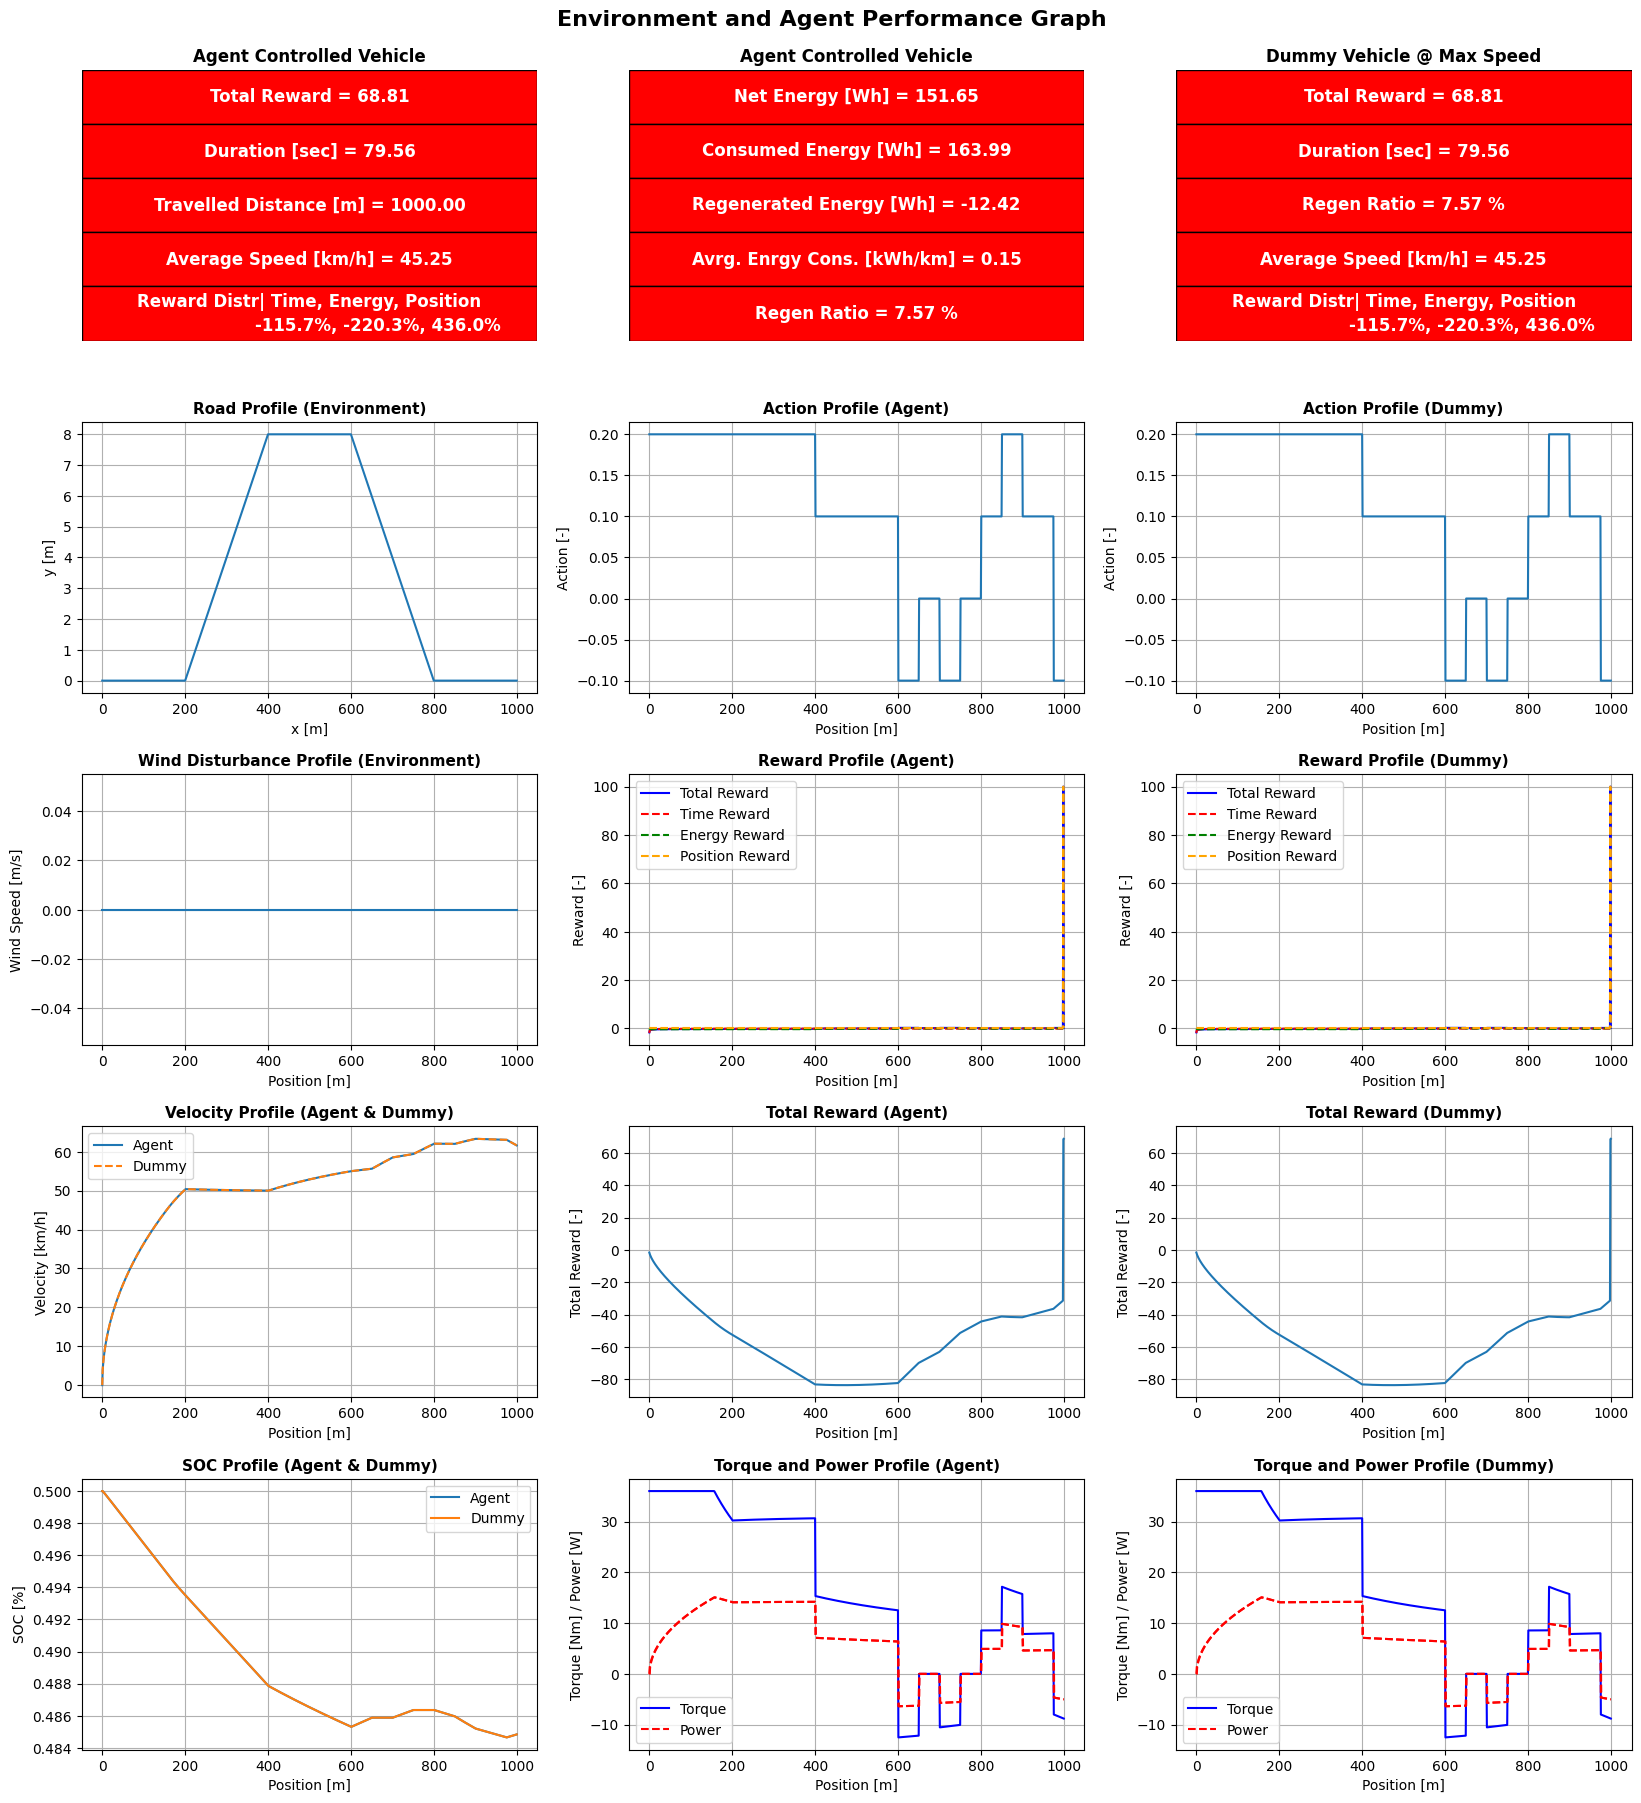

In [27]:
def grapher(env, database, database_2, show_fig):
    # Reward distribution calculation
    database = database.astype(float)
    total_time_reward = database['dt_Time_reward'].sum()
    total_energy_reward = database['dt_Energy_reward'].sum()
    total_position_reward = database['dt_Position_reward'].sum()
    total_reward = database['Total_Reward'].sum()
    time_reward_percentage = float(total_time_reward) / float(total_reward) *100          # % of the total reward
    energy_reward_percentage = float(total_energy_reward) / float(total_reward) *100      # % of the total reward
    position_reward_percentage = float(total_position_reward) / float(total_reward) *100  # % of the total reward
    print("Total Reward: ", total_reward)
    print("Total Time Reward: ", total_time_reward)
    print("Total Energy Reward: ", total_energy_reward)
    print("Total Position Reward: ", total_position_reward)


    fig, axs = plt.subplots(5,3,figsize=(20,20))
    fig.suptitle('Environment and Agent Performance Graph', fontsize=16, fontweight='bold')
    
    # Adding the Performance Indicator Squares
    # Subplot 1
    # Total Reward
    axs[0,0].title.set_text('Agent Controlled Vehicle')
    axs[0,0].title.set_fontsize(12)
    axs[0,0].title.set_fontweight('bold')
    axs[0,0].axis('off')
    axs[0,0].add_patch(patches.Rectangle((0.0, 0.8), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['Total_Reward'].sum(),".2f")
    axs[0,0].text(0.5, 0.9, 'Total Reward = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Total Time
    axs[0,0].add_patch(patches.Rectangle((0.0, 0.6), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['Duration'].iloc[-1],".2f")
    axs[0,0].text(0.5, 0.7, 'Duration [sec] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Distace Traveled
    axs[0,0].add_patch(patches.Rectangle((0.0, 0.4), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['Pos'].iloc[-1],".2f")
    axs[0,0].text(0.5, 0.5, 'Travelled Distance [m] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Average Speed, km/h
    axs[0,0].add_patch(patches.Rectangle((0.0, 0.2), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['Pos'].iloc[-1]/database['Duration'].iloc[-1]*3.6,".2f")
    axs[0,0].text(0.5, 0.3, 'Average Speed [km/h] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Reward distribution over time, energy and position
    axs[0,0].add_patch(patches.Rectangle((0.0, 0.0), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text_1 = format(time_reward_percentage,".1f")
    formatted_text_2 = format(energy_reward_percentage,".1f")
    formatted_text_3 = format(position_reward_percentage,".1f")
    axs[0,0].text(0.5, 0.11, 'Reward Distr| Time, Energy, Position', ha='center', va='bottom', color='white', fontsize=12,fontweight='bold')
    axs[0,0].text(0.65, 0.09, '{}%, {}%, {}%'.format(formatted_text_1,formatted_text_2,formatted_text_3), ha='center', va='top', color='white', fontsize=12,fontweight='bold')
    del formatted_text, formatted_text_1, formatted_text_2, formatted_text_3
    
    # Subplot 2
    axs[0,1].title.set_text('Agent Controlled Vehicle')
    axs[0,1].title.set_fontsize(12)
    axs[0,1].title.set_fontweight('bold')
    axs[0,1].axis('off')
    # Total Energy
    axs[0,1].add_patch(patches.Rectangle((0.0, 0.8), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['Energy'].iloc[-1]*1000,".2f")
    axs[0,1].text(0.5, 0.9, 'Net Energy [Wh] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Consumted Energy
    axs[0,1].add_patch(patches.Rectangle((0.0, 0.6), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['dt_Energy_wh'][database['dt_Energy_wh'] > 0].sum(),".2f")
    axs[0,1].text(0.5, 0.7, 'Consumed Energy [Wh] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Regenerated Energy
    axs[0,1].add_patch(patches.Rectangle((0.0, 0.4), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['dt_Energy_wh'][database['dt_Energy_wh'] < 0].sum(),".2f")
    axs[0,1].text(0.5, 0.5, 'Regenerated Energy [Wh] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Average Energy Consumption, Wh/km
    axs[0,1].add_patch(patches.Rectangle((0.0, 0.2), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database['Energy'].iloc[-1]/(database['Pos'].iloc[-1]/1000),".2f")
    axs[0,1].text(0.5, 0.3, 'Avrg. Enrgy Cons. [kWh/km] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Regen Ratio
    axs[0,1].add_patch(patches.Rectangle((0.0, 0.0), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(abs((database['dt_Energy_wh'][database['dt_Energy_wh'] < 0].sum()/database['dt_Energy_wh'][database['dt_Energy_wh'] > 0].sum())*100),".2f")
    axs[0,1].text(0.5, 0.1, 'Regen Ratio = {} %'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    
    
    
    
    # Subplot 3
    # Plot the road
    axs[1,0].plot(env.road['x'], env.road['y'])
    axs[1,0].set_xlabel('x [m]')
    axs[1,0].set_ylabel('y [m]')
    axs[1,0].set_title('Road Profile (Environment)', fontsize=11, fontweight='bold')
    axs[1,0].grid()
    
    # Subplot 4
    # Plot the actions
    axs[1,1].plot(database['Pos'], database['act'])
    axs[1,1].set_xlabel('Position [m]')
    axs[1,1].set_ylabel('Action [-]')
    axs[1,1].set_title('Action Profile (Agent)', fontsize=11, fontweight='bold')
    axs[1,1].grid()
    
    # Subplot 5
    # Plot the velocity
    axs[3,0].plot(database['Pos'], database['v']*3.6)
    axs[3,0].plot(database_2['Pos'], database_2['v']*3.6, '--')
    axs[3,0].set_xlabel('Position [m]')
    axs[3,0].set_ylabel('Velocity [km/h]')
    axs[3,0].set_title('Velocity Profile (Agent & Dummy)', fontsize=11, fontweight='bold')
    axs[3,0].legend(['Agent','Dummy'], loc='upper left', fontsize=10)
    axs[3,0].grid()
    
    # Subplot 6
    # Plot the Rewards
    axs[2,1].plot(database['Pos'], database['Total_Reward'], color='blue')
    axs[2,1].plot(database['Pos'], database['dt_Time_reward'], '--', color='red')
    axs[2,1].plot(database['Pos'], database['dt_Energy_reward'], '--', color='green')
    axs[2,1].plot(database['Pos'], database['dt_Position_reward'], '--', color='orange')
    axs[2,1].set_xlabel('Position [m]')
    axs[2,1].set_ylabel('Reward [-]')
    axs[2,1].set_title('Reward Profile (Agent)', fontsize=11, fontweight='bold')
    axs[2,1].legend(['Total Reward','Time Reward','Energy Reward','Position Reward'], loc='upper left', fontsize=10)
    axs[2,1].grid()
    
    # Subplot 7
    # Plot the Power and Energy
    axs[2,0].plot(database['Pos'], database['Wind'])
    axs[2,0].set_xlabel('Position [m]')
    axs[2,0].set_ylabel('Wind Speed [m/s]')
    axs[2,0].set_title('Wind Disturbance Profile (Environment)', fontsize=11, fontweight='bold')
    axs[2,0].grid()
    
    # Subplot 8
    # Plot the SOC
    axs[4,0].plot(database['Pos'], database['SOC'])
    axs[4,0].plot(database_2['Pos'], database_2['SOC'])
    axs[4,0].set_xlabel('Position [m]')
    axs[4,0].set_ylabel('SOC [%]')
    axs[4,0].set_title('SOC Profile (Agent & Dummy)', fontsize=11, fontweight='bold')
    axs[4,0].legend(['Agent','Dummy'], loc='upper right', fontsize=10)
    axs[4,0].grid()
    
    # Subplot 9
    # Plot the Torque and Power
    axs[4,1].plot(database['Pos'], database['Torque'], color='blue')
    axs[4,1].plot(database['Pos'], database['Power'], '--', color='red')
    axs[4,1].set_xlabel('Position [m]')
    axs[4,1].set_ylabel('Torque [Nm] / Power [W]')
    axs[4,1].set_title('Torque and Power Profile (Agent)', fontsize=11, fontweight='bold')
    axs[4,1].legend(['Torque','Power'], loc='lower left', fontsize=10)
    axs[4,1].grid()
    
    
    
    # Plot the Total Reward
    axs[3,1].plot(database['Pos'], database['Total_Reward'].cumsum())
    axs[3,1].set_xlabel('Position [m]')
    axs[3,1].set_ylabel('Total Reward [-]')
    axs[3,1].set_title('Total Reward (Agent)', fontsize=11, fontweight='bold')
    axs[3,1].grid()
    
    # 3rd Column
    # Subplot 1
    # Total Reward
    axs[0,2].title.set_text('Dummy Vehicle @ Max Speed')
    axs[0,2].title.set_fontsize(12)
    axs[0,2].title.set_fontweight('bold')
    axs[0,2].axis('off')
    axs[0,2].add_patch(patches.Rectangle((0.0, 0.8), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database_2['Total_Reward'].sum(),".2f")
    axs[0,2].text(0.5, 0.9, 'Total Reward = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Total Time
    axs[0,2].add_patch(patches.Rectangle((0.0, 0.6), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database_2['Duration'].iloc[-1],".2f")
    axs[0,2].text(0.5, 0.7, 'Duration [sec] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Distace Traveled
    # Regen Ratio
    axs[0,2].add_patch(patches.Rectangle((0.0, 0.4), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(abs((database_2['dt_Energy_wh'][database_2['dt_Energy_wh'] < 0].sum()/database_2['dt_Energy_wh'][database_2['dt_Energy_wh'] > 0].sum())*100),".2f")
    axs[0,2].text(0.5, 0.5, 'Regen Ratio = {} %'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Average Speed, km/h
    axs[0,2].add_patch(patches.Rectangle((0.0, 0.2), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text = format(database_2['Pos'].iloc[-1]/database_2['Duration'].iloc[-1]*3.6,".2f")
    axs[0,2].text(0.5, 0.3, 'Average Speed [km/h] = {}'.format(formatted_text), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
    # Reward distribution over time, energy and position
    axs[0,2].add_patch(patches.Rectangle((0.0, 0.0), 1.0, 0.2, facecolor='red', edgecolor='black'))
    formatted_text_1 = format(time_reward_percentage,".1f")
    formatted_text_2 = format(energy_reward_percentage,".1f")
    formatted_text_3 = format(position_reward_percentage,".1f")
    axs[0,2].text(0.5, 0.11, 'Reward Distr| Time, Energy, Position', ha='center', va='bottom', color='white', fontsize=12,fontweight='bold')
    axs[0,2].text(0.65, 0.09, '{}%, {}%, {}%'.format(formatted_text_1,formatted_text_2,formatted_text_3), ha='center', va='top', color='white', fontsize=12,fontweight='bold')
    del formatted_text, formatted_text_1, formatted_text_2, formatted_text_3

    # Plot the actions
    axs[1,2].plot(database_2['Pos'], database_2['act'])
    axs[1,2].set_xlabel('Position [m]')
    axs[1,2].set_ylabel('Action [-]')
    axs[1,2].set_title('Action Profile (Dummy)', fontsize=11, fontweight='bold')
    axs[1,2].grid()

    # Plot the Rewards
    axs[2,2].plot(database_2['Pos'], database_2['Total_Reward'], color='blue')
    axs[2,2].plot(database_2['Pos'], database_2['dt_Time_reward'], '--', color='red')
    axs[2,2].plot(database_2['Pos'], database_2['dt_Energy_reward'], '--', color='green')
    axs[2,2].plot(database_2['Pos'], database_2['dt_Position_reward'], '--', color='orange')
    axs[2,2].set_xlabel('Position [m]')
    axs[2,2].set_ylabel('Reward [-]')
    axs[2,2].set_title('Reward Profile (Dummy)', fontsize=11, fontweight='bold')
    axs[2,2].legend(['Total Reward','Time Reward','Energy Reward','Position Reward'], loc='upper left', fontsize=10)
    axs[2,2].grid()

    # Plot the Total Reward
    axs[3,2].plot(database_2['Pos'], database_2['Total_Reward'].cumsum())
    axs[3,2].set_xlabel('Position [m]')
    axs[3,2].set_ylabel('Total Reward [-]')
    axs[3,2].set_title('Total Reward (Dummy)', fontsize=11, fontweight='bold')
    axs[3,2].grid()

    # Plot the Torque and Power
    axs[4,2].plot(database_2['Pos'], database_2['Torque'], color='blue')
    axs[4,2].plot(database_2['Pos'], database_2['Power'], '--', color='red')
    axs[4,2].set_xlabel('Position [m]')
    axs[4,2].set_ylabel('Torque [Nm] / Power [W]')
    axs[4,2].set_title('Torque and Power Profile (Dummy)', fontsize=11, fontweight='bold')
    axs[4,2].legend(['Torque','Power'], loc='lower left', fontsize=10)
    axs[4,2].grid()

    # Plot Adjusting
    plot = plt.subplots_adjust(hspace=0.3, top=0.95)
    if show_fig == True: plt.show()
    formatted_text = format(total_reward,".2f")
    return total_reward, plot, fig



total_reward, plot, fig = grapher(env, database, database_2, show_fig=True)


In [46]:
x = range(1001+1)

In [48]:
x[1001]

1001

In [50]:
import math

# Optimized Road Profiler Function: This function creates a road profile with given gradient and distance.
def Road_Profiler(gradient, distance):
    """This function creates a road profile with given gradient and distance.
        Input: gradient [%], distance [m].
        Output: A Road D; D.gradient, D.degree, D.radian, D.x, D.y, D.Distance.
        ----------
        How To Use
        D1 = Road_Profiler(0, 200).
        D2 = Road_Profiler(0.04, 200).
        D3 = Road_Profiler(0, 200).
        D4 = Road_Profiler(-0.04, 200).
        D5 = Road_Profiler(0, 200).
        """
    D = {}
    D['Gradient'] = np.full(distance+1, gradient)
    D['degree'] = math.atan(D['Gradient'][1]) * 180 / math.pi
    D['radian'] = math.atan(D['Gradient'][1])
    D['x'] = np.arange(distance+1) * math.cos(D['radian'])
    D['y'] = np.where(D['radian'] == 0, 0, np.arange(distance+1) * math.sin(D['radian']))
    D['Distance'] = distance

    return D
# Optimized Road Merger Function: This function merges the road profiles.
def Road_Merger(R):
    """This function merges the road profiles.
        Input: R = [D1, D2, D3, D4, D5, ...]
        Output: Merged roads; Road.x, Road.y, Road.gradients, Road.Distances, Road.Total_Distance. 
        ----------
        """
    Road = {'x': [], 'y': [], 'Gradient': [], 'Distances': [], 'Total_Distance': 0}

    road_count = len(R)
    
    for i in range(road_count):
        if i == 0:
            Road['x'].extend(R[i]['x'])
            Road['y'].extend(R[i]['y'])
            Road['Gradient'].extend(R[i]['Gradient'])
        else:
            Road['x'].extend(Road['x'][-1] + R[i]['x'][1:])
            Road['y'].extend(Road['y'][-1] + R[i]['y'][1:])
            Road['Gradient'].extend(R[i]['Gradient'][1:])

        Road['Distances'].append(R[i]['Distance'])
        Road['Total_Distance'] += R[i]['Distance']

    # Convert lists to NumPy arrays
    for key in ['x', 'y', 'Gradient', 'Distances']:
        Road[key] = np.array(Road[key])

    return Road

D1 = Road_Profiler(0,200)
D2 = Road_Profiler(0.04,200)
D3 = Road_Profiler(0,200)
D4 = Road_Profiler(-0.04,200)
D5 = Road_Profiler(0,200)
road = Road_Merger([D1,D2,D3,D4,D5])

In [58]:
len(road['x'])
road['x'][1001]

IndexError: index 1001 is out of bounds for axis 0 with size 1001

In [61]:
D1['x'][200]

200.0